THE SPARKS FOUNDATION

DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

TASK 1: Prediction Using Supervised ML

BY: AMAN JAIN

PROBLEM STATEMENT - Predict the percentage of an student based on the no. of study hours.

Importing main libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing Linear Regression Model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Reading and describing dataset

In [6]:
url = "http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Visualising dataset using plot

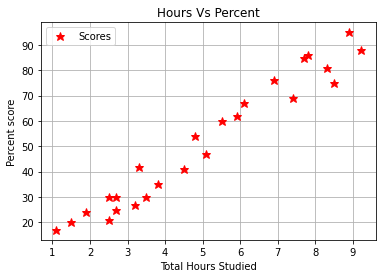

In [9]:
df.plot(x='Hours', y='Scores', color='red', style='*', markersize='9')
plt.title('Hours Vs Percent')
plt.xlabel('Total Hours Studied')
plt.ylabel('Percent score')
plt.grid()
plt.show()

The above plot shows that the variables Hours and Scores have a linear relationship between them as both of them are increasing parallely.

Now, we will use the .corr function to determine actual corelation between the variables.

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Preparing the data

We will divide the data into dependent and independent variables using .iloc function

In [11]:
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

Splitting the data into training and testing data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

Training the Algorithm

After spliting the data, we will train our Model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now, we will be printing the coefficients and intercepts of model using .coef & .intercept function.

In [14]:
model.coef_

array([[9.91065648]])

In [15]:
model.intercept_

array([2.01816004])

Visualizing Model

Plotting the training data

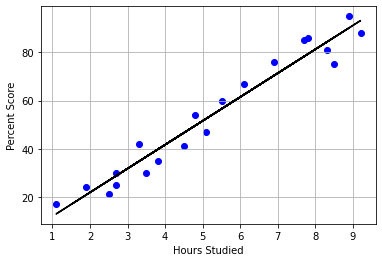

In [16]:
line = model.coef_*X + model.intercept_  # Plotting the regression line

plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='black');
plt.xlabel('Hours Studied')  
plt.ylabel('Percent Score') 
plt.grid()
plt.show()

Plotting the testing data

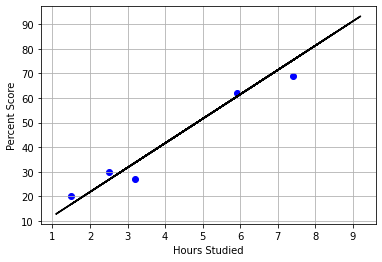

In [17]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X, line, color='black');
plt.xlabel('Hours Studied')  
plt.ylabel('Percent Score') 
plt.grid()
plt.show()

Predicting the model

In [18]:
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Creating the dataframe that will include Actual and Predicted score

In [19]:
df1 = pd.DataFrame ({'Actual score': [y_test], 'Predicted score': [y_pred] })  
df1

,Actual score,Predicted score
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


Now, answering the question asked in the task- 
What will be predicted score if a student studies for 9.25 hrs/ day?

We will now predict the score for the given 9.25 hrs.

In [20]:
hrs = 9.25
g_pred = model.predict([[hrs]])
print("The predicted score for a person who studies for",hrs,"hours is",g_pred[0])

The predicted score for a person who studies for 9.25 hours is [93.69173249]


###### [93.69173249] is the answer

Evaluating the Model by calculating MAE and r score

In [21]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
print('r2 = {}'.format(r_squared))

Mean Absolute Error: 4.183859899002975
r2 = 0.9454906892105356


From the above calculation of R_score (0.95 approx) we can conclude that our dependent variable is much more predictable without any error

In this regression task we estimate the percentage of marks a student is expected to receive based on the number of hours he or she studied. This is an easy Linear Regression task based on supervised learning as it includes just two variables (Hours and Scores).